In [65]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
# Load data
ticker=input("Enter ticker symbol")
df = yf.download(ticker, start="2010-01-01", end="2023-04-01")

Enter ticker symbolgoog


[*********************100%%**********************]  1 of 1 completed


In [66]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293
2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494
2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526
2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695
2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313


In [67]:
df.reset_index(inplace=True)

In [68]:
df['Date']=pd.to_datetime(df['Date'])

In [69]:
print("No. of days of data:")
df['Date'].max()-df['Date'].min()

No. of days of data:


Timedelta('4834 days 00:00:00')

<AxesSubplot:>

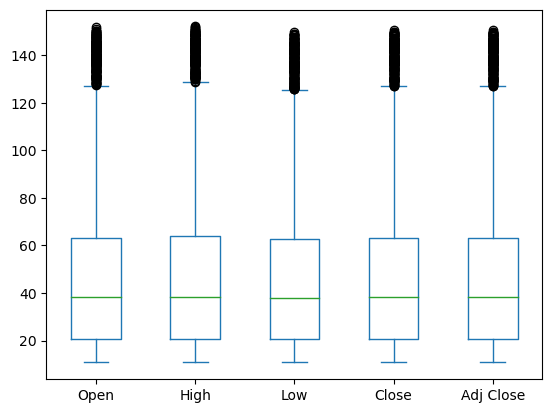

In [70]:
df[['Open','High','Low','Close','Adj Close']].plot(kind='box')

<AxesSubplot:>

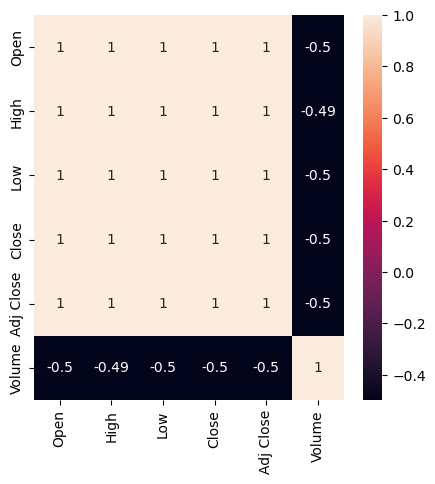

In [76]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(method='pearson'),annot=True)

In [77]:
layout=go.Layout(
    title=f'Stock Prices of {ticker}',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
stock_data=[{'x':df['Date'],'y':df['Close']}]
plot=go.Figure(data=stock_data,layout=layout)


In [78]:
iplot(plot)

In [85]:
# Filter DataFrame for dates between 2018 and 2019
df_2018_2019 = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2019-12-31')]

# Create traces for Low and High prices
trace_low = go.Scatter(x=df_2018_2019['Date'], y=df_2018_2019['Low'], mode='lines', name='Low', line=dict(color='red'))
trace_high = go.Scatter(x=df_2018_2019['Date'], y=df_2018_2019['High'], mode='lines', name='High', line=dict(color='blue'))

# Create layout
layout = go.Layout(
    title='Stock Prices between 2018 and 2019',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price'),
    plot_bgcolor='rgba(0,0,0,0)'  # Set plot background color to transparent
)

# Create figure and add traces
fig = go.Figure(data=[trace_low, trace_high], layout=layout)

# Show the plot
fig.show()

In [55]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [56]:
X=np.array(df.index).reshape(-1,1)
Y=df['Close']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)


In [57]:
scaler=StandardScaler().fit(X_train)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [60]:
trace0=go.Scatter(
    x=X_train.T[0],
    y=Y_train,
    mode='markers',
    name='Actual'
)
trace1=go.Scatter(
    x=X_train.T[0],
    y=lm.predict(X_train).T,
    mode='lines',
    name='Predicted'
)
stock_data=[trace0,trace1]
layout.xaxis.title.text='Day'
plot2=go.Figure(data=stock_data,layout=layout)

In [61]:
iplot(plot2)

In [62]:
scores=f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train,lm.predict(X_train))}\t{r2_score(Y_test,lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train,lm.predict(X_train))}\t{mse(Y_test,lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8120873325425959	0.8268841935848401
MSE       246.69720422166225	234.7009545063774



## Part 2

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3334 entries, 0 to 3333
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3334 non-null   datetime64[ns]
 1   Open       3334 non-null   float64       
 2   High       3334 non-null   float64       
 3   Low        3334 non-null   float64       
 4   Close      3334 non-null   float64       
 5   Adj Close  3334 non-null   float64       
 6   Volume     3334 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 182.5 KB
